# Titanic Project with Keras and Deep Learning

In this project, we will solve the Titanic dataset challenge using Keras and deep learning techniques. Building on our previous work with the Titanic dataset, we will now leverage the power of neural networks to predict passenger survival. This approach will allow us to explore more complex patterns in the data and potentially achieve better predictive performance.

<img src="https://www.pigeonforgetncabins.com/wp-content/uploads/2015/06/experience-at-titanic-pigeon-forge.jpg">

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [70]:
df_train = pd.read_csv('ttrain.csv')
df_test = pd.read_csv('ttest.csv')

In [71]:
df = pd.concat([df_train, df_test], ignore_index=True)

### EDA - Exploratory Data Analysis

In [72]:
df.shape

(1309, 12)

In [73]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [74]:
df.Fare.mean(), df.Fare.max(), df.Fare.min(), df.Fare.median(), df.Fare.std()

(33.29547928134557, 512.3292, 0.0, 14.4542, 51.75866823917414)

<Axes: xlabel='Embarked', ylabel='count'>

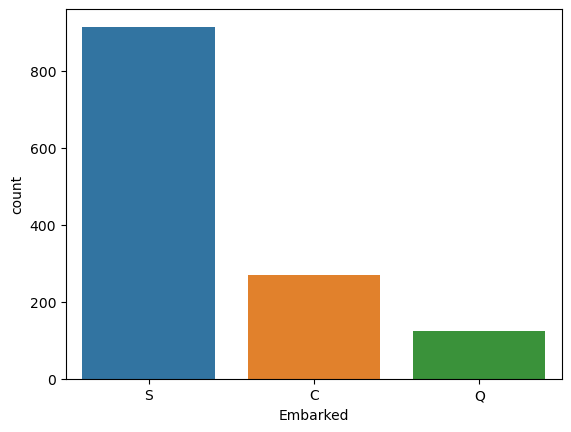

In [75]:
sns.countplot(x=df.Embarked)

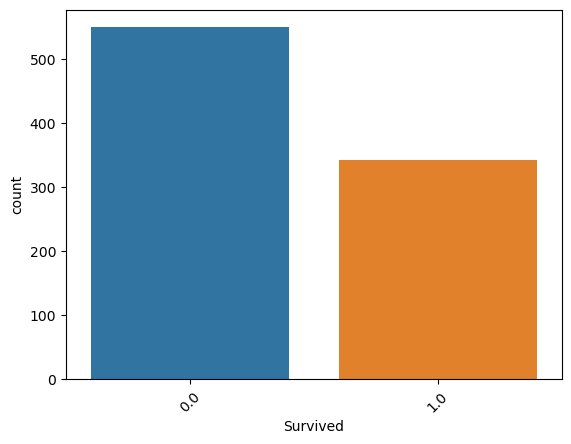

In [76]:
sns.countplot(x=df['Survived'])
plt.xticks(rotation=45);

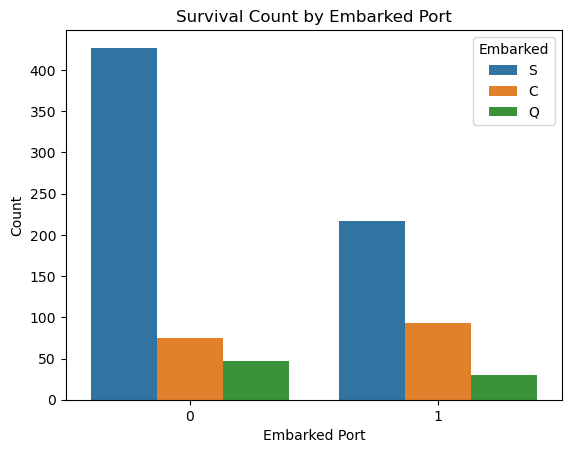

In [77]:
sns.countplot(x='Survived', hue='Embarked', data=df_train)
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [78]:
df.Embarked.fillna('S', inplace=True)

In [79]:
df.Cabin.value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [80]:
df.drop('Cabin', axis=1, inplace=True)

In [81]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=True)

In [82]:
df.Title = df.Title.replace(['Ms', 'Mile','Mlle'], 'Miss')
df.Title = df.Title.replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')
df.Title = df.Title.replace(['Dr', 'Major','Col', 'Sir', 'Rev', 'Jonkheer', 'Capt', 'Don'], 'Mr')

In [83]:
df.Title.value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [84]:
df= df.drop(['Name'], axis=1)

In [85]:
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))

In [86]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.024425,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.075808,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.386723,0.060832,0.018322,-0.558629
Age,0.024425,-0.075808,-0.386723,1.000000,-0.216262,-0.132567,0.177806
SibSp,-0.055224,-0.035322,0.060832,-0.216262,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.132567,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.177806,0.160238,0.221539,1.000000


## Modelling

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [88]:
df = pd.get_dummies(df, drop_first=True)

In [89]:
train  = df[df.Survived.notnull()]
test = df[df.Survived.isnull()].drop('Survived', axis=1)

In [90]:
x = train.drop(['Survived'], axis=1)
y = train['Survived']

In [91]:
model = Sequential()
model.add(Dense(120, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [92]:
history = model.fit(x, y, epochs=250, batch_size=32, validation_split=0.2, verbose=1) 

Epoch 1/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4348 - loss: 2.0314 - val_accuracy: 0.6425 - val_loss: 0.6913
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5991 - loss: 0.6916 - val_accuracy: 0.6425 - val_loss: 0.6898
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6374 - loss: 0.6889 - val_accuracy: 0.6480 - val_loss: 0.6863
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6051 - loss: 0.6867 - val_accuracy: 0.6760 - val_loss: 0.6770
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6209 - loss: 0.6867 - val_accuracy: 0.6704 - val_loss: 0.6784
Epoch 6/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6266 - loss: 0.6810 - val_accuracy: 0.7151 - val_loss: 0.6593
Epoch 7/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6789 - loss: 0.6741 - val_accuracy: 0.6872 - val_loss: 0.6655
Epoch 8/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6253 - loss: 0.6781 - val_accuracy: 0.6704 - v

In [93]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 120)            │       112,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 80)             │         9,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 4)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391,331 (1.49 MB)

 Trainable params: 130,443 (509.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 260,888 (1019.10 KB)

In [94]:
import matplotlib.pyplot as plt

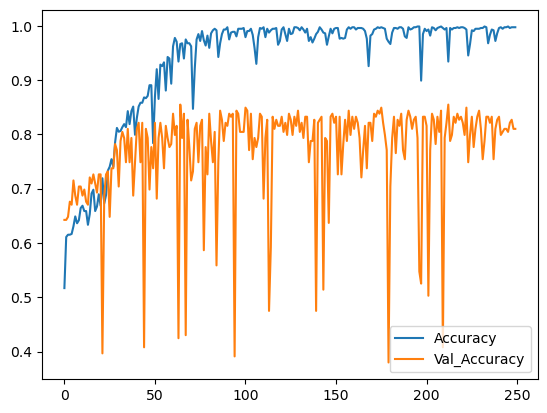

In [95]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend();

In [96]:
predict = model.predict(test).flatten() 
predict = (predict > 0.5).astype("int64")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [97]:
predict

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [98]:
result = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': predict})
result['Survived'] = result['Survived'].astype('int64')

In [99]:
result.to_csv('titanic.csv', index=False)

## Results

<img src="results.png">